In [332]:
import pandas as pd
dt=pd.read_csv('donnees_vol_multiple.csv')
import numpy as np

In [333]:
dt.head()

,mission_id,time,target_x,target_y,target_z,real_x,real_y,real_z,vx,vy,...,wind_y,wind_z,erreur_m,erreur_ok,velocity,erreur_cumulee_m,battery_level,rain,fog,snow
0,1,1.743261e+09,0,0,-5,0.926892,0.879754,-2.090096,0.068411,0.106190,...,1.690491,0.594968,3.178151,False,7.75,3.178151,100,0.05,0.06,0.06
1,1,1.743261e+09,5,0,-5,0.935570,0.930550,-2.083748,0.093259,0.092600,...,1.637688,0.584705,5.088226,False,7.75,8.266377,100,0.05,0.06,0.06
2,1,1.743261e+09,10,0,-5,0.963747,0.977302,-2.081154,0.105984,0.063462,...,2.439325,0.463539,9.546132,False,7.75,17.812509,100,0.05,0.06,0.06
3,1,1.743261e+09,5,0,-5,1.123713,0.980221,-2.076691,0.033718,-0.041689,...,2.329868,0.558701,4.952996,False,7.75,22.765505,100,0.05,0.06,0.06
4,1,1.743261e+09,0,0,-5,1.147911,0.923325,-2.077217,-0.025396,-0.041343,...,2.285455,0.498501,3.273055,False,7.75,26.038560,100,0.05,0.06,0.06


In [334]:
df=dt
df=df.loc[df['erreur_m']<20]

df=df.drop(columns=['mission_id','real_y','real_z','real_x','battery_level'],axis=1)

In [335]:
df=df.drop(columns=['erreur_m'],axis=1)
variances = df.var()
Y=df['erreur_ok']

In [336]:
Y=Y.replace({
    'True':1 ,
    'False':0
})

In [337]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['time']=scaler.fit_transform(df[['time']])

In [338]:
seuil = 150
mediane = df['erreur_cumulee_m'].median()

df.loc[df['erreur_cumulee_m'] > seuil, 'erreur_cumulee_m'] = mediane

In [339]:
X_ex=df

In [340]:
X_ex['ax']=np.exp(df['ax'])
X_ex['ay']=np.exp(df['ay'])
X_ex['ax']=np.exp(X_ex['ax'])
X_ex['ay']=np.exp(X_ex['ay'])

In [341]:
X_ex=X_ex.drop(columns=['erreur_ok'])

In [342]:
seuil = 3.6
mediane = X_ex['ax'].median()

X_ex.loc[X_ex['ax'] > seuil, 'ax'] = mediane

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ex, Y, test_size=0.1, random_state=42)

In [344]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

In [345]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9040816326530612

In [346]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.88      0.90       240
        True       0.89      0.93      0.91       250

    accuracy                           0.90       490
   macro avg       0.91      0.90      0.90       490
weighted avg       0.91      0.90      0.90       490



In [347]:
best_knn = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    metric='manhattan'
)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [348]:

y_pred = best_knn.predict(X_test)

print("Accuracy sur le jeu de test :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy sur le jeu de test : 0.9204081632653062
              precision    recall  f1-score   support

       False       0.94      0.90      0.92       240
        True       0.90      0.94      0.92       250

    accuracy                           0.92       490
   macro avg       0.92      0.92      0.92       490
weighted avg       0.92      0.92      0.92       490



In [349]:
X_ex.describe()

,time,target_x,target_y,target_z,vx,vy,vz,ax,ay,az,...,pitch,yaw,wind_x,wind_y,wind_z,velocity,erreur_cumulee_m,rain,fog,snow
count,4.891000e+03,4891.000000,4891.000000,4891.0,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,...,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000
mean,-4.450778e-13,4.276222,0.415048,-5.0,-0.048058,0.045500,0.208613,2.644555,2.691312,-10.081038,...,0.001597,0.170507,3.001185,1.995584,0.498779,7.630237,11.236038,0.204171,0.149916,0.162226
std,1.000102e+00,4.103413,2.730478,0.0,1.248202,0.946927,0.470903,0.242417,0.249331,0.590357,...,0.157583,2.351562,0.289557,0.289636,0.057591,4.088292,16.337378,0.114202,0.158436,0.172481
min,-1.465069e+00,0.000000,-10.000000,-5.0,-8.637990,-9.398471,-2.713042,1.087483,1.074936,-15.286637,...,-0.740134,-3.141541,2.500005,1.500191,0.400013,2.000000,0.051157,0.000000,0.000000,0.001000
25%,-6.050757e-01,0.000000,0.000000,-5.0,-0.777918,-0.316433,-0.067642,2.512790,2.558034,-10.313288,...,-0.028752,-2.417848,2.750170,1.742993,0.449699,4.660000,1.906138,0.100000,0.042000,0.040000
50%,-2.246152e-01,5.000000,0.000000,-5.0,-0.025417,0.008316,0.024780,2.642232,2.672004,-9.913689,...,-0.000015,0.221736,3.002801,1.995637,0.498209,7.020000,4.037337,0.210000,0.079000,0.083000
75%,1.535450e-01,5.000000,0.000000,-5.0,0.750655,0.387404,0.676779,2.773034,2.796683,-9.807195,...,0.027735,2.707979,3.253125,2.245287,0.547692,9.090000,14.373024,0.300000,0.227000,0.251500
max,2.230219e+00,15.000000,10.000000,-5.0,10.852567,10.065331,6.753635,3.590499,6.717410,-2.197845,...,0.787873,3.140995,3.499809,2.499839,0.599868,19.920000,147.690653,0.400000,0.797000,0.789000


In [350]:
from sklearn.model_selection import GridSearchCV
model2=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [351]:
grid = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [352]:
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score :", grid.best_score_)

Meilleurs paramètres : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Meilleur score : 0.8997905272933651


In [353]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_knn,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
# Moyenne et écart-type
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

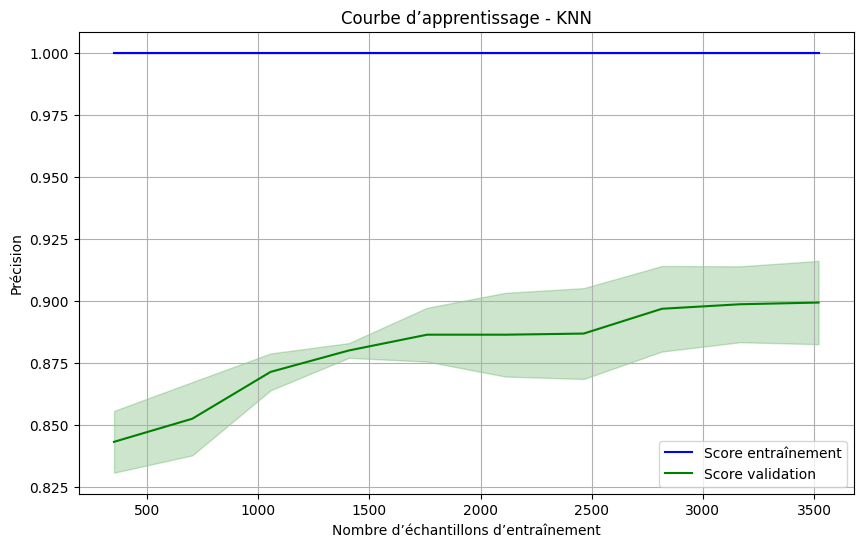

In [354]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Score entraînement', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Score validation', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title('Courbe d’apprentissage - KNN')
plt.xlabel('Nombre d’échantillons d’entraînement')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()

In [355]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('regressor', best_knn)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy sur le jeu de test :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy sur le jeu de test : 0.9204081632653062
              precision    recall  f1-score   support

       False       0.94      0.90      0.92       240
        True       0.90      0.94      0.92       250

    accuracy                           0.92       490
   macro avg       0.92      0.92      0.92       490
weighted avg       0.92      0.92      0.92       490



In [356]:
from sklearn.feature_selection import f_classif
import pandas as pd

X = X_ex[['ax', 'ay', 'az','erreur_cumulee_m','wind_z']]
 # binaire ou catégorielle

F, p = f_classif(X, Y)

for i, col in enumerate(X.columns):
    print(f"{col} → F-score : {F[i]:.2f}, p-value : {p[i]:.4f}")

ax → F-score : 13.49, p-value : 0.0002
ay → F-score : 0.33, p-value : 0.5639
az → F-score : 1.74, p-value : 0.1868
erreur_cumulee_m → F-score : 1839.87, p-value : 0.0000
wind_z → F-score : 1.80, p-value : 0.1793


In [357]:
d_test=pd.read_csv('data_test_final.csv')

d_test=d_test.drop(columns=['mission_id','real_y','real_z','real_x','battery_level'],axis=1)
d_test['time']=scaler.fit_transform(d_test[['time']])
d_test=d_test.loc[d_test['erreur_m']<20]
Z=d_test
W=Z['erreur_ok']
Z=Z.drop(columns=['erreur_ok'])
Z=Z.drop(columns=['erreur_m'])
y_pred = pipeline.predict(Z)
W=W.replace({
    'True':1 ,
    'False':0
})
mediane = Z['erreur_cumulee_m'].median()

Z.loc[Z['erreur_cumulee_m'] > 150, 'erreur_cumulee_m'] = mediane
seuil = 3
Z['ax']=np.exp(Z['ax'])
Z['ay']=np.exp(Z['ay'])
Z['ax']=np.exp(Z['ax'])
Z['ay']=np.exp(Z['ay'])


mediane = Z['ax'].median()

Z.loc[Z['ax'] > seuil, 'ax'] = mediane
y_pred = pipeline.predict(Z)
print("Accuracy sur le jeu de test :", accuracy_score(W, y_pred))
print(classification_report(W, y_pred))


Accuracy sur le jeu de test : 0.9110212335692619
              precision    recall  f1-score   support

       False       0.95      0.90      0.92       564
        True       0.87      0.93      0.90       425

    accuracy                           0.91       989
   macro avg       0.91      0.91      0.91       989
weighted avg       0.91      0.91      0.91       989



In [358]:
import joblib

# Sauvegarde dans un fichier
joblib.dump(pipeline, "mon_knn_model.pkl")

['mon_knn_model.pkl']